Датасет взят по ссылке https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees

In [1]:
import numpy as np
import pandas as pd

In [2]:
# считываем данные
X = pd.read_csv("garments_worker_productivity.csv")

In [3]:
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Задача регрессии - предсказание фактической производительности

    Информация об атрибутах:
    date - дата в ММ-ДД-ГГГГ;
    quarter - номер недели в месяце;
    department - отдел;
    day - день недели;
    team - номер команды работников;
    targeted_productivity - целевая производительность, установленная руководством для каждой команды на каждый день;
    smv - стандартное значение минуты, это выделенное время для выполнения задачи;
    wip - незавершенная работа;
    over_time - количество сверхурочных каждой команды в минутах;
    incentive - сумма финансового стимула;
    idle_time - количество времени, когда производство было прервано;
    idle_men - количество работников, которые простаивали из-за перерыва в производстве;
    no_of_style_change - количество изменений в стиле конкретного продукта;
    no_of_workers - количество работников в каждой команде (в десятках, сотнях или других кратных десяти величинах);
    actual_productivity - фактический процент производительности, который был достигнут работниками.

In [5]:
X.no_of_style_change.value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

In [6]:
X.no_of_workers.value_counts()

8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
29.5      1
11.0      1
21.0      1
6.0       1
33.5      1
Name: no_of_workers, Length: 61, dtype: int64

In [7]:
X.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

Представлены данные о работе двух отделов - пошива (sewing) и отделки (finishing)

In [8]:
# исправим опечатки в поле department
X.department = [d.replace('sweing', 'sewing') for d in X.department]
X.department = [d.replace('finishing ', 'finishing') for d in X.department]

In [9]:
X.department.value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

In [10]:
X.incentive.value_counts()

0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
55        7
81        7
100       7
69        6
65        6
70        6
960       5
35        5
94        4
44        4
90        3
46        2
24        2
27        2
119       2
49        2
98        1
21        1
1200      1
62        1
25        1
1080      1
93        1
29        1
1440      1
32        1
33        1
2880      1
54        1
37        1
138       1
53        1
3600      1
Name: incentive, dtype: int64

In [11]:
X.idle_time.value_counts()

0.0      1179
3.5         3
4.0         2
4.5         2
8.0         2
5.0         2
2.0         2
270.0       1
150.0       1
6.5         1
300.0       1
90.0        1
Name: idle_time, dtype: int64

In [12]:
X.idle_men.value_counts()

0     1179
30       3
20       3
15       3
10       3
35       2
45       1
40       1
37       1
25       1
Name: idle_men, dtype: int64

In [13]:
X.wip.value_counts()

1039.0    5
1282.0    4
1108.0    3
1448.0    3
759.0     3
         ..
1500.0    1
824.0     1
1512.0    1
869.0     1
1239.0    1
Name: wip, Length: 548, dtype: int64

array([[<AxesSubplot:title={'center':'team'}>,
        <AxesSubplot:title={'center':'targeted_productivity'}>,
        <AxesSubplot:title={'center':'smv'}>],
       [<AxesSubplot:title={'center':'wip'}>,
        <AxesSubplot:title={'center':'over_time'}>,
        <AxesSubplot:title={'center':'incentive'}>],
       [<AxesSubplot:title={'center':'idle_time'}>,
        <AxesSubplot:title={'center':'idle_men'}>,
        <AxesSubplot:title={'center':'no_of_style_change'}>],
       [<AxesSubplot:title={'center':'no_of_workers'}>,
        <AxesSubplot:title={'center':'actual_productivity'}>,
        <AxesSubplot:>]], dtype=object)

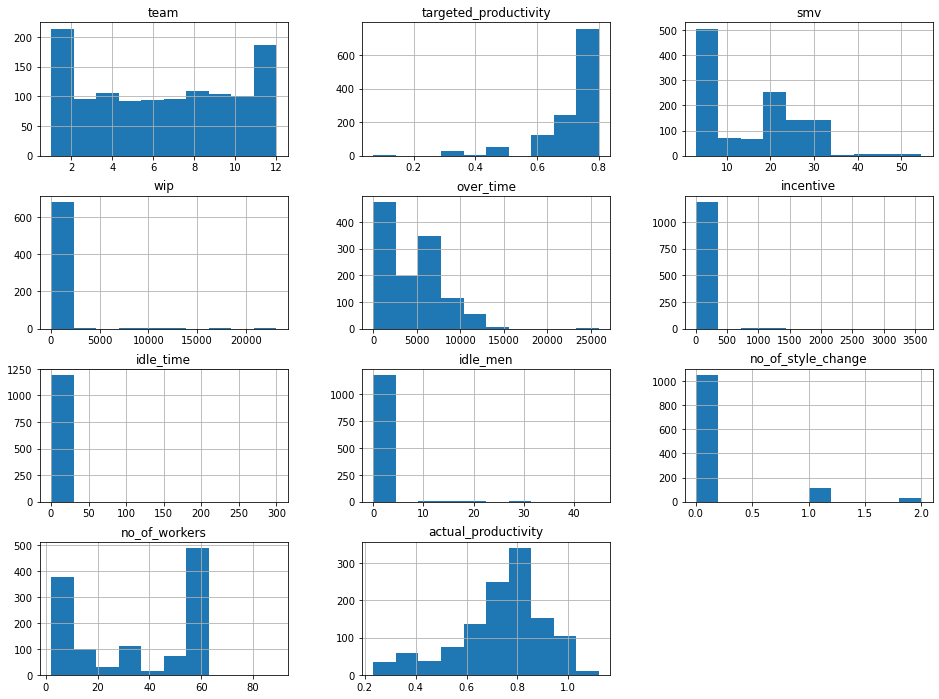

In [14]:
# построение гистограмм
X.hist(figsize=(16,12))

In [15]:
# матрица корреляций
X.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


Из матрицы корреляций видим, что существуют сильные положительные зависимости между smv, over_time и no_of_workers.

array([[<AxesSubplot:xlabel='team', ylabel='team'>,
        <AxesSubplot:xlabel='targeted_productivity', ylabel='team'>,
        <AxesSubplot:xlabel='smv', ylabel='team'>,
        <AxesSubplot:xlabel='wip', ylabel='team'>,
        <AxesSubplot:xlabel='over_time', ylabel='team'>,
        <AxesSubplot:xlabel='incentive', ylabel='team'>,
        <AxesSubplot:xlabel='idle_time', ylabel='team'>,
        <AxesSubplot:xlabel='idle_men', ylabel='team'>,
        <AxesSubplot:xlabel='no_of_style_change', ylabel='team'>,
        <AxesSubplot:xlabel='no_of_workers', ylabel='team'>,
        <AxesSubplot:xlabel='actual_productivity', ylabel='team'>],
       [<AxesSubplot:xlabel='team', ylabel='targeted_productivity'>,
        <AxesSubplot:xlabel='targeted_productivity', ylabel='targeted_productivity'>,
        <AxesSubplot:xlabel='smv', ylabel='targeted_productivity'>,
        <AxesSubplot:xlabel='wip', ylabel='targeted_productivity'>,
        <AxesSubplot:xlabel='over_time', ylabel='targeted_produc

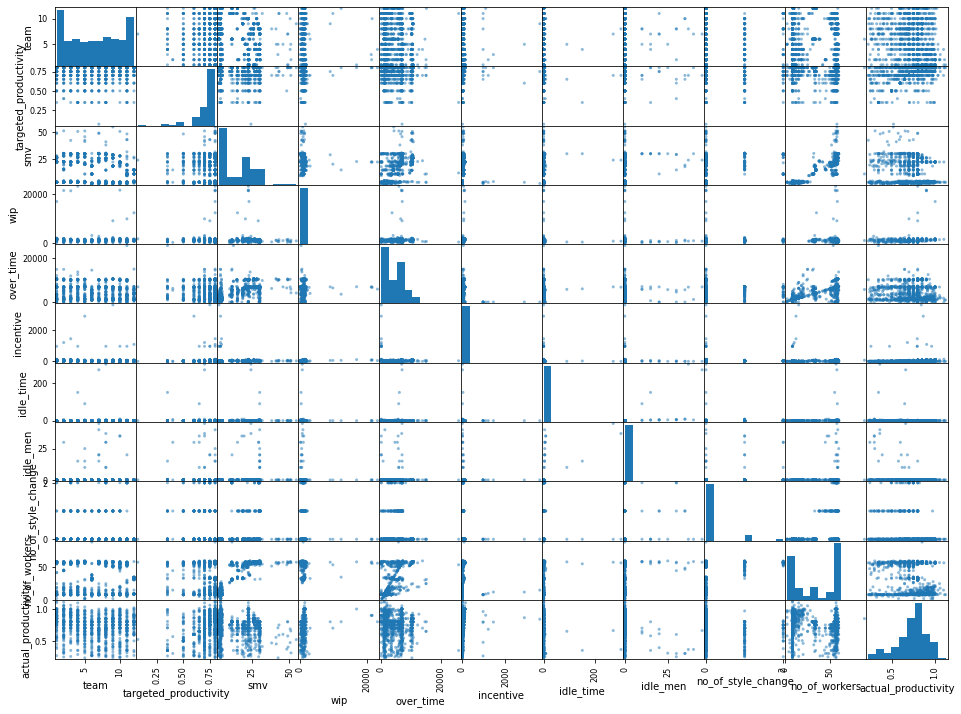

In [16]:
# диаграммы рассеяния
pd.plotting.scatter_matrix(X, figsize=(16,12))

Это предположение подтверждается и диаграммами рассеяния

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [18]:
# кодируем поле quarter обычным способом
X['quarter'] = pd.factorize(X['quarter'])[0]

In [19]:
# кодируем поле day с помощью map
weekday = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
X.day = X.day.map(weekday)

Так как поле department нельзя упорядочить по сложности или времени выполнения, то закодируем его методом дамми-кодирования

In [20]:
# кодируем поле department методом дамми-кодирования
X = pd.concat([X,  pd.get_dummies(X['department'])],  axis=1)
# удаляем старое поле department 
X.drop(['department'], axis=1, inplace=True)

In [21]:
# преобразуем формат даты в datetime
X.date = pd.to_datetime(X.date)
# преобразуем из datetime в int
X.date=X['date'].dt.strftime("%Y%m%d").astype(int)

In [22]:
# так как нельзя однозначно сказать, что wip не влияет на фактическую производительность, то заполним пропуски в этом поле
X.wip.fillna(X.wip.median(), inplace=True)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  finishing              1197 non-null   uint8  
 15  sewi

In [24]:
# извлекаем зависимую перменную
y = X.pop('actual_productivity')